<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/Glaucoma_detection_using_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries **

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2
from PIL import Image

%matplotlib inline

*Declare list variables to store the image and corresponding label*

In [0]:
dataset = []
label = []

In [0]:
import os
# Directory with our infected pictures
Glaucoma_dir = os.path.join('/content/drive/My Drive/Deep Learning Project/Glaucoma')

# Directory with our uninfected pictures
Non_Glaucoma_dir = os.path.join('/content/drive/My Drive/Deep Learning Project/Non Glaucoma')

# *Converting Glaucoma images into an array of shape(64,64) with 3 channels and generate labels for each corresponding image as 0 - for Glaucoma affected*

In [0]:
Glaucoma_dir

'/content/drive/My Drive/Deep Learning Project/Glaucoma'

In [0]:
parasitized_images = os.listdir(Glaucoma_dir)
for i, image_name in enumerate(parasitized_images):
    try:
        if (image_name.split('.')[1] == 'jpg' or image_name.split('.')[1] =='tif'):
            image = cv2.imread(Glaucoma_dir+"/"+image_name)
            #print(image_name)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = Image.fromarray(image)
            image = image.resize((64, 64))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

# *Shape of the data containing Glaucoma images*

In [0]:
dataset[0].shape

(64, 64, 3)

In [0]:
len(dataset)

40

# *Converting Non Glaucoma images into an array of shape(64,64) with 3 channels and generate labels for each corresponding image as 0 - for not Glaucoma affected*

In [0]:
uninfected_images = os.listdir(Non_Glaucoma_dir)
for i, image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1] == 'tif'):
            image = cv2.imread(Non_Glaucoma_dir + '/' + image_name)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = Image.fromarray(image)
            image = image.resize((64, 64))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [0]:
dataset[-1].shape

(64, 64, 3)

# *Randomly ploting 5 different Glaucoma images*

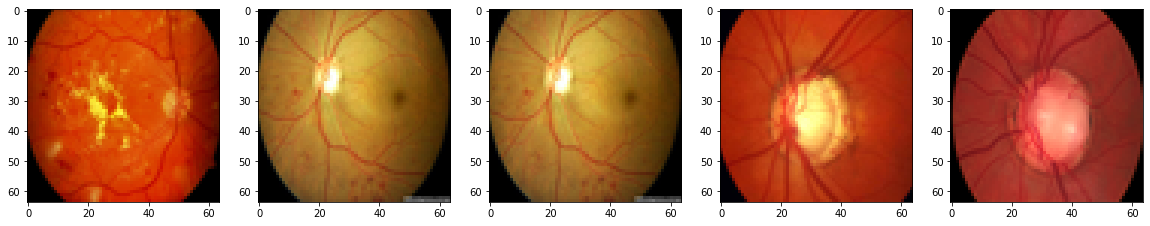

In [0]:
plt.figure(figsize = (20, 12))

for i , image_index in enumerate(np.random.randint(len(parasitized_images),size=5)):
  plt.subplot(1,5,i  + 1)
  plt.imshow(dataset[image_index])

#Randomly ploting 5 different Non Glaucoma images 

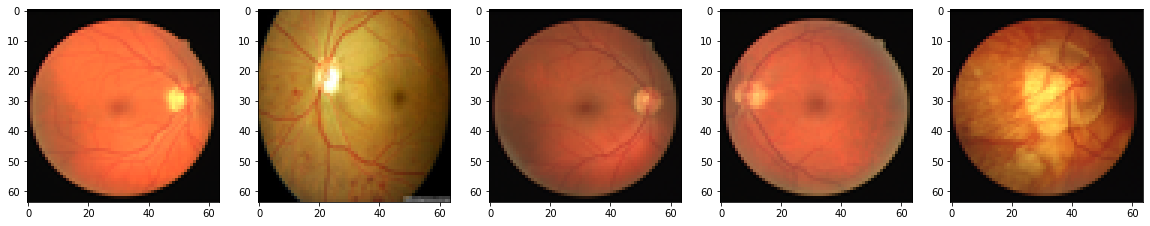

In [0]:
plt.figure(figsize = (20, 12))

for i , image_index in enumerate(np.random.randint(len(uninfected_images),size=5)):
  plt.subplot(1,5,i  + 1)
  plt.imshow(dataset[-image_index])

# Converting the list of unseen images into an array -Predictor set 

In [0]:
X = np.array(dataset)
print(X.shape)

(80, 64, 64, 3)


In [0]:
#Y= np.array(label).reshape(-1,1)
Y= np.array(label)
Y.shape

(80,)

*Randomly ploting the images from input array = X*

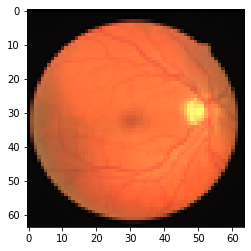

In [0]:
plt.imshow(X[-1])

In [0]:
Y[-1]

1

#### Note : label 1 - uninfected

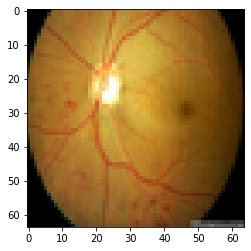

In [0]:
plt.imshow(X[0])

In [0]:
Y[0]

0

#### Note : label 0 - infected

# *Test Train Split*

In [0]:
from sklearn.model_selection import train_test_split
# Split data into train/test = 80%/20%
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [104]:
print(X_train.shape)
print(X_test.shape)

(64, 64, 64, 3)
(16, 64, 64, 3)


In [105]:
print(y_train.shape)
print(y_test.shape)

(64,)
(16,)


In [106]:
X_train[0].shape

(64, 64, 3)

# Using a pretrained convnet

A pretrained convnet is a saved network that was previously trained on a large dataset typically on a large scale image classification task.

Here we will use **VGG16 architecture** .It is a simple and widely used convnet architecture for ImageNet

1. Build a Convoluional base model taking the base of a prevoiusly trained model.

2. Run the new data through it

3. Train a new classifier on top of it.

In [0]:
from keras.layers import Input,Dense,Flatten
from keras.models import Model,Sequential
from keras.applications import VGG16
from glob import glob

In [0]:
convolution_base = VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3))

# Detailed Architecture of VGG16 convolutional base

In [109]:
convolution_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

# Do not train existing weights - Freezing set of layers preventing their weights to get updated during training

In [0]:
for layer in convolution_base.layers:
  layer.trainable = False

# Get the number of classes

In [0]:
n_classes = glob('/content/drive/My Drive/Deep Learning Project/*')

In [0]:
n_classes

['/content/drive/My Drive/Deep Learning Project/Non Glaucoma',
 '/content/drive/My Drive/Deep Learning Project/Glaucoma']

# Adding Densely connected classifier on top of the convolutional base

In [0]:
model = Sequential()
model.add(convolution_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [112]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 15,239,489
Trainable params: 524,801
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
train_dir = '/content/drive/My Drive/Glaucoma_recognition/train'
validation_dir = '/content/drive/My Drive/Glaucoma_recognition/validation'

# Data Augmentation

In [0]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

In [0]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [118]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(64,64),batch_size=20,class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(64,64),batch_size=20,class_mode='binary')

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


# Compile the Model

In [0]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=0.001),metrics=['acc'])

# Train the model on the rescaled images

In [120]:
history = model.fit_generator(train_generator,steps_per_epoch=10,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
10/10 [==============================] - 18s 2s/step - loss: 0.3043 - acc: 0.8550 - val_loss: 0.1066 - val_acc: 1.0000
Epoch 2/30
10/10 [==============================] - 18s 2s/step - loss: 0.0161 - acc: 1.0000 - val_loss: 0.0536 - val_acc: 1.0000
Epoch 3/30
10/10 [==============================] - 17s 2s/step - loss: 0.0267 - acc: 1.0000 - val_loss: 0.0113 - val_acc: 1.0000
Epoch 4/30
10/10 [==============================] - 17s 2s/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.0817 - val_acc: 1.0000
Epoch 5/30
10/10 [==============================] - 17s 2s/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0331 - val_acc: 1.0000
Epoch 6/30
10/10 [==============================] - 18s 2s/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.9692 - val_acc: 0.7500
Epoch 7/30
10/10 [==============================] - 17s 2s/step - loss: 0.0090 - acc: 0.9950 - val_loss: 0.0937 - val_acc: 0.9500
Epoch 8/30
10/10 [==============================] - 17s 2s/step - loss: 7.6290e-04 - acc: 

# Ploting the results

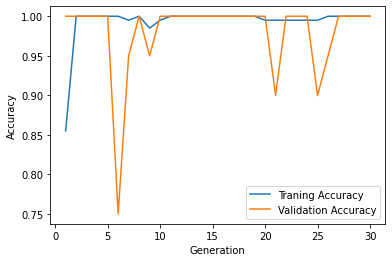

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
sns.lineplot(epochs,acc,label='Traning Accuracy')
sns.lineplot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend()

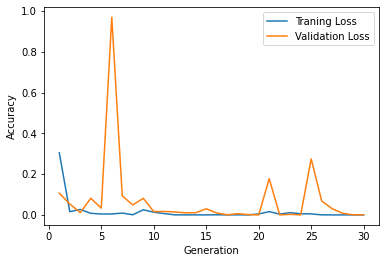

In [122]:
sns.lineplot(epochs,loss,label='Traning Loss')
sns.lineplot(epochs,val_loss,label='Validation Loss')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend()

# Evaluate the Model

In [125]:
test_loss,test_acc = model.evaluate(validation_generator,steps=50)

50/50 [==============================] - 15s 300ms/step


In [126]:
test_loss,test_acc

(0.00047792805708013475, 1.0)

# Predictions

In [0]:
preds = model.predict(X_test)

In [0]:
preds

array([[1.000000e+00],
       [0.000000e+00],
       [9.789274e-13],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [0.000000e+00],
       [1.000000e+00],
       [0.000000e+00],
       [1.000000e+00],
       [9.789274e-13],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00]], dtype=float32)

# Validate the Predictions made by the pretrained  Model

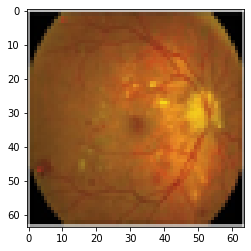

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is Glaucoma affected
The above image is predicted as Glaucoma affected.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


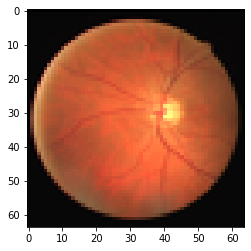

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is not Glaucoma affected
The above image is predicted as not affected by Glaucoma.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


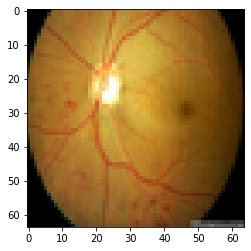

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is Glaucoma affected
The above image is predicted as not affected by Glaucoma.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


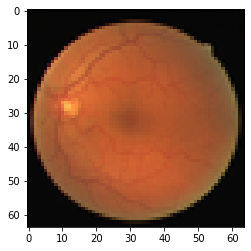

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is not Glaucoma affected
The above image is predicted as not affected by Glaucoma.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


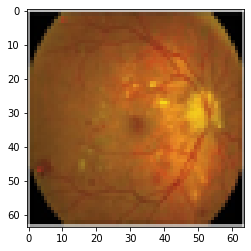

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is Glaucoma affected
The above image is predicted as Glaucoma affected.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


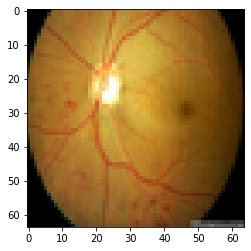

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is Glaucoma affected
The above image is predicted as not affected by Glaucoma.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


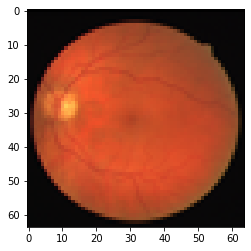

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is not Glaucoma affected
The above image is predicted as not affected by Glaucoma.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


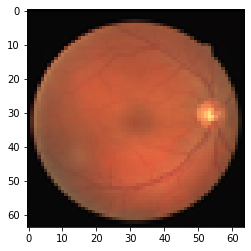

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is not Glaucoma affected
The above image is predicted as not affected by Glaucoma.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


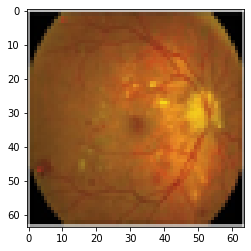

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is Glaucoma affected
The above image is predicted as Glaucoma affected.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


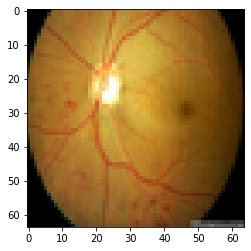

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The actual image is Glaucoma affected
The above image is predicted as not affected by Glaucoma.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [0]:
rand_index = np.random.choice(len(X_test), size=10)
for i in rand_index:
  #predictions = np.argmax(preds,axis=1)[i]
  images = X_test[i]
  actuals = y_test[i]
  print('='*80)
  plt.imshow(images)
  plt.show()
  if actuals ==0:
    msg ='The actual image is Glaucoma affected'
  else:
    msg = 'The actual image is not Glaucoma affected'
  print("+"*80)
  print(msg)
  if preds[i] <= 0.5 :
    print('The above image is predicted as Glaucoma affected.')
    
  else:
    print('The above image is predicted as not affected by Glaucoma.')
  print("+"*80)
 


In [131]:
img_path = '/content/eye_diseases_and_cond_s3_glaucoma.JPEG'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path,target_size=(64,64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /=255.
print(img_tensor.shape)

(1, 64, 64, 3)


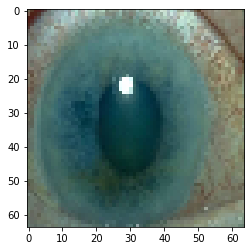

In [133]:
plt.imshow(img_tensor[0])
plt.show()

In [0]:
img_predict = model.predict(img_tensor)

In [137]:
img_predict

array([[9.2598185e-07]], dtype=float32)

In [136]:
if img_predict <= 0.5 :
  print('The above image is predicted as Glaucoma affected.')
    
else:
  print('The above image is predicted as not affected by Glaucoma.')

The above image is predicted as Glaucoma affected.


*This image has been picked from https://images.medicinenet.com/images/slideshow/eye_diseases_and_cond_s3_glaucoma.jpg and is actually a Glaucoma affected image and the model has also correctly identified it.*

# Fine Tuning 

Unfreezing few top layers of a forozen model base used for feature extraction and jointly training newly added layers and top layers.

This is called fine tuning because it slightly adjusts more abstract representations ofd the model being reused in order to improve their relevancy for a problem in hand

In [0]:
convolution_base.trainable = True
set_trianable = False
for layer in convolution_base.layers:
  if layer.name == 'block5_conv1':
    set_trianable = True
  if set_trianable:
    layer.trainable =True
  else:
    layer.trainable = False


In [175]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=0.001),metrics=['acc'])
history = model.fit_generator(train_generator,steps_per_epoch=10,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
10/10 [==============================] - 18s 2s/step - loss: 47.4180 - acc: 0.6000 - val_loss: 0.9027 - val_acc: 0.5000
Epoch 2/30
10/10 [==============================] - 18s 2s/step - loss: 1.1924 - acc: 0.4800 - val_loss: 0.5724 - val_acc: 0.5500
Epoch 3/30
10/10 [==============================] - 17s 2s/step - loss: 0.7189 - acc: 0.6600 - val_loss: 0.2343 - val_acc: 1.0000
Epoch 4/30
10/10 [==============================] - 18s 2s/step - loss: 1.1821 - acc: 0.7450 - val_loss: 0.1660 - val_acc: 0.9500
Epoch 5/30
10/10 [==============================] - 17s 2s/step - loss: 0.1615 - acc: 0.9250 - val_loss: 1.2580e-08 - val_acc: 1.0000
Epoch 6/30
10/10 [==============================] - 18s 2s/step - loss: 2.8034e-04 - acc: 1.0000 - val_loss: 2.1482e-12 - val_acc: 1.0000
Epoch 7/30
10/10 [==============================] - 17s 2s/step - loss: 1.0306 - acc: 0.9250 - val_loss: 1.7325e-07 - val_acc: 1.0000
Epoch 8/30
10/10 [==============================] - 17s 2s/step - loss: 1

# Plot the Results of Freezing

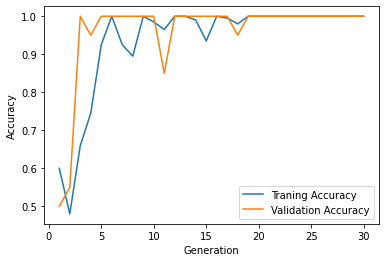

In [185]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
sns.lineplot(epochs,acc,label='Traning Accuracy')
sns.lineplot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

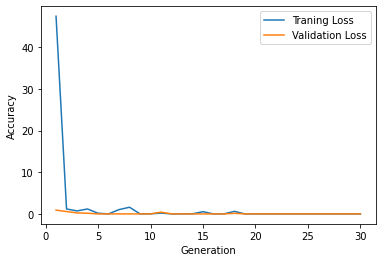

In [177]:
sns.lineplot(epochs,loss,label='Traning Loss')
sns.lineplot(epochs,val_loss,label='Validation Loss')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend()

In [0]:

layer_outputs = [layer.get_output_at(-1) for layer in model.layers] 
layer_outputs = layer_outputs[1:] 
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [0]:
activations = activation_model.predict(img_tensor)

In [181]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 2048)


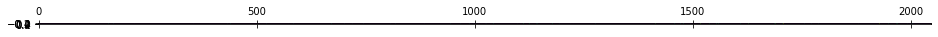

In [184]:
plt.matshow(first_layer_activation[:4])